In [1]:
# Import standard libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import Functions
from functions import *

In [2]:
original_data = pd.read_csv('.\data\winequality-red.csv')
original_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
original_data.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(original_data)

In [6]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [7]:
pd.DataFrame(X_scaled,columns=original_data.columns).describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,0.000000,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
volatile acidity,1599.000000,0.000000,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
citric acid,1599.000000,-0.000000,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
residual sugar,1599.000000,-0.000000,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
chlorides,1599.000000,0.000000,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
free sulfur dioxide,1599.000000,-0.000000,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
total sulfur dioxide,1599.000000,0.000000,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
density,1599.000000,-0.000000,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
pH,1599.000000,0.000000,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
sulphates,1599.000000,0.000000,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


<Axes: ylabel='Density'>

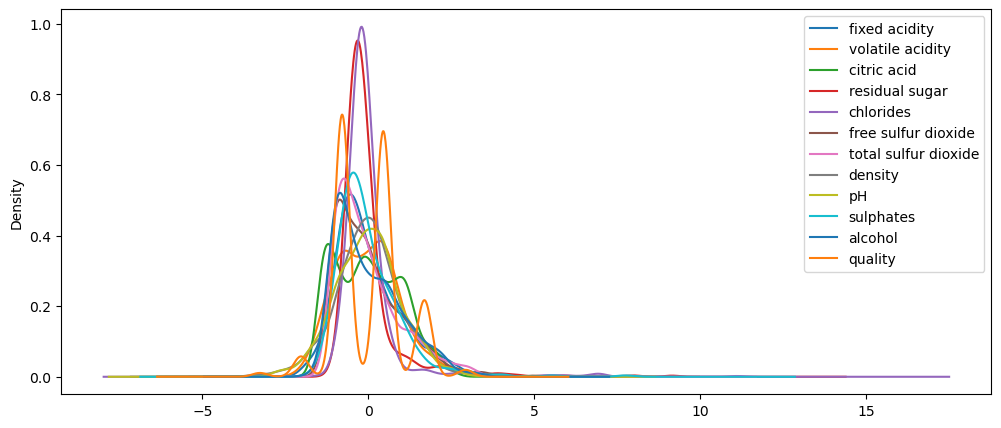

In [8]:
pd.DataFrame(X_scaled,columns=original_data.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [9]:
# Perform a PCA on our standardised data:
# Select the number of principal components we will return
num_components = 12

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=12)

In [11]:
pca.explained_variance_ratio_.round(2)

array([0.26, 0.19, 0.14, 0.1 , 0.08, 0.06, 0.05, 0.04, 0.03, 0.03, 0.02,
       0.  ])

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.26009731, 0.44692081, 0.58716412, 0.68841586, 0.76952116,
       0.82473718, 0.87626366, 0.91841971, 0.95269534, 0.98002195,
       0.99504017, 1.        ])

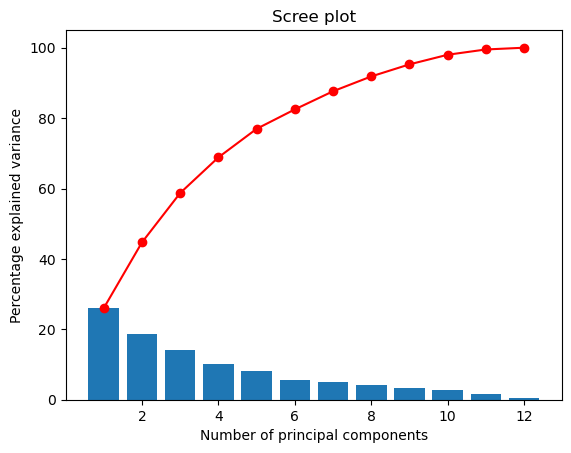

In [13]:
display_scree_plot(pca)

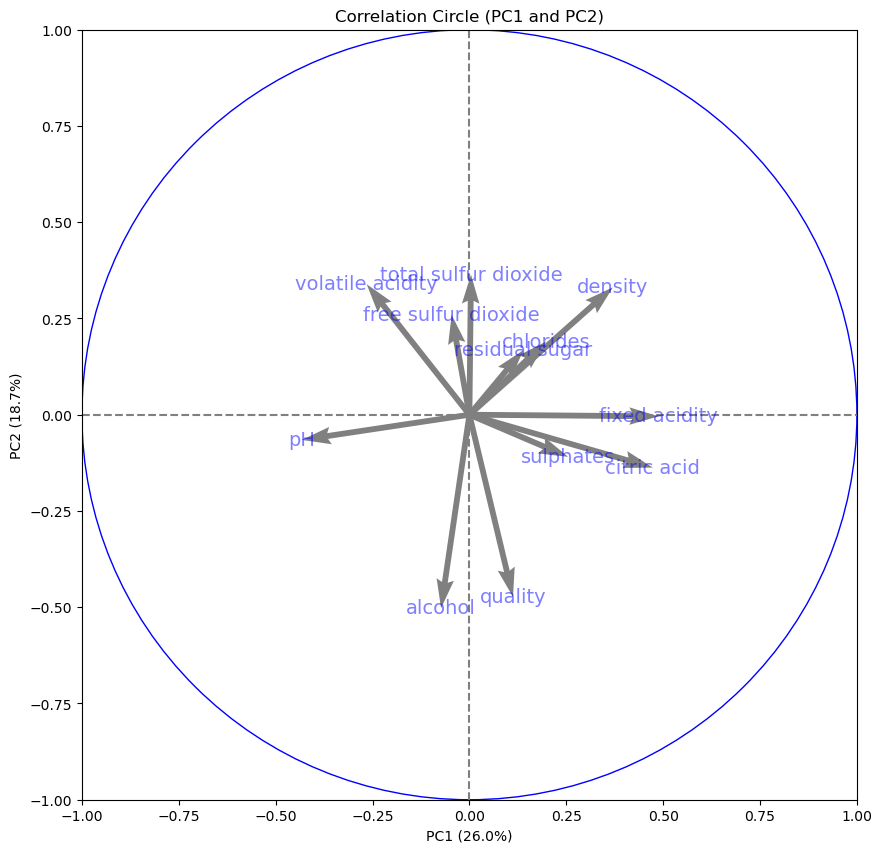

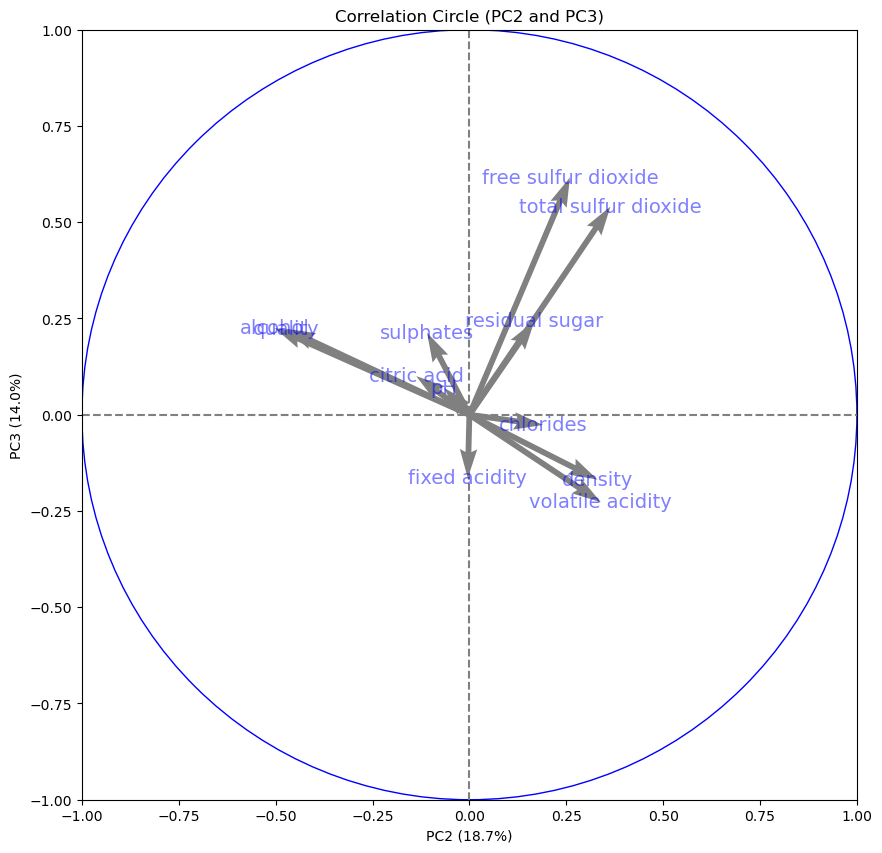

In [15]:
pcs = pca.components_
display_circles(pcs,num_components,pca,[(0,1),(1,2)],labels=np.array(original_data.columns))